# Metadata Overview: EDA

In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the metadata
file_path = "../manifest-1745037983505/metadata.csv"
metadata_df = pd.read_csv(file_path)

In [3]:
# Convert date fields to datetime
metadata_df['Study Date'] = pd.to_datetime(metadata_df['Study Date'], errors='coerce')
metadata_df['Download Timestamp'] = pd.to_datetime(metadata_df['Download Timestamp'], errors='coerce')

# Convert 'File Size' to MB
def parse_file_size(size_str):
    try:
        size_str = size_str.strip()
        if size_str.endswith("KB"):
            return float(size_str.replace("KB", "").strip()) / 1024
        elif size_str.endswith("MB"):
            return float(size_str.replace("MB", "").strip())
        elif size_str.endswith("GB"):
            return float(size_str.replace("GB", "").strip()) * 1024
        else:
            return np.nan
    except:
        return np.nan

metadata_df['File Size (MB)'] = metadata_df['File Size'].apply(parse_file_size)


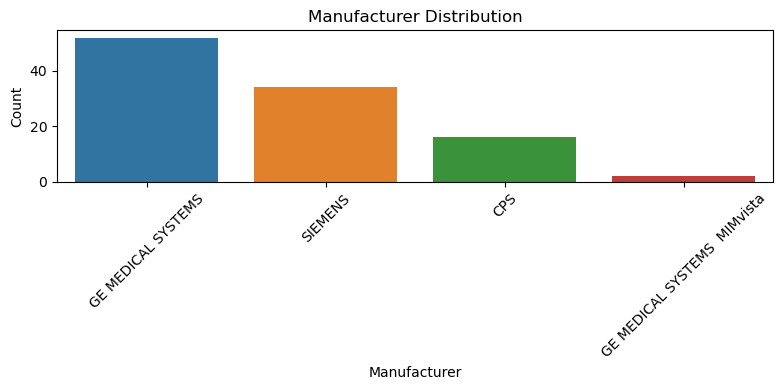

In [5]:
# Manufacturer Distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=metadata_df, x='Manufacturer', order=metadata_df['Manufacturer'].value_counts().index)
plt.title("Manufacturer Distribution")
plt.ylabel("Count")
plt.xlabel("Manufacturer")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

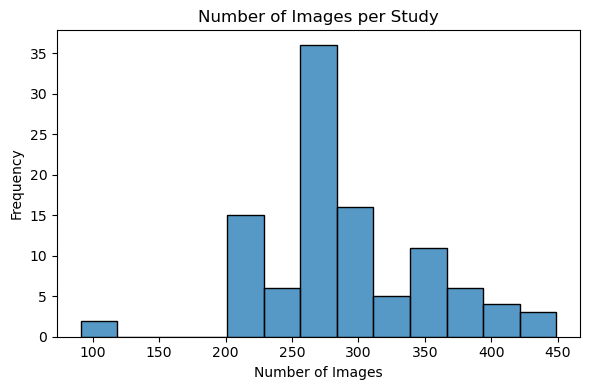

In [9]:
# Number of Images per Study
plt.figure(figsize=(6, 4))
sns.histplot(metadata_df['Number of Images'])
plt.title("Number of Images per Study")
plt.xlabel("Number of Images")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

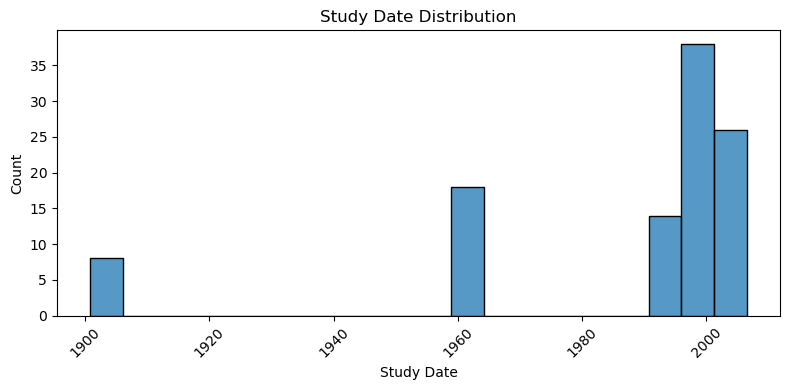

In [8]:
# Study Date Distribution
plt.figure(figsize=(8, 4))
sns.histplot(metadata_df['Study Date'].dropna(), bins=20)
plt.title("Study Date Distribution")
plt.xlabel("Study Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

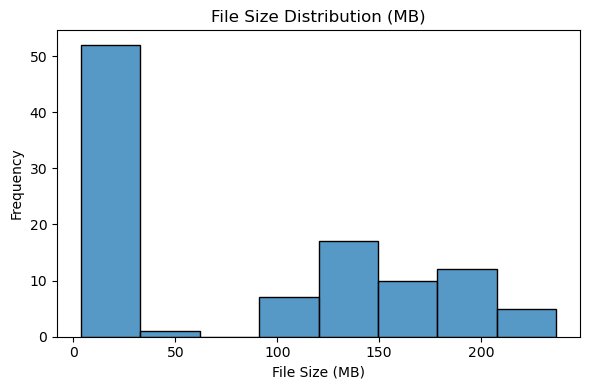

In [7]:
# File Size Distribution (MB)
plt.figure(figsize=(6, 4))
sns.histplot(metadata_df['File Size (MB)'].dropna())
plt.title("File Size Distribution (MB)")
plt.xlabel("File Size (MB)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()